# Project 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 1

In [97]:
def plot_heatmap(ax, data, title = ""):
    s = ax.pcolor(data, cmap="gnuplot")
    ax.invert_yaxis()
    fig.colorbar(s, ax = ax)
    ax.set_title(title)
    ax.set_xticks(list(np.arange(0,11)))
    ax.set_yticks(list(np.arange(0,11)))
    ax.set_aspect('equal')
    return ax

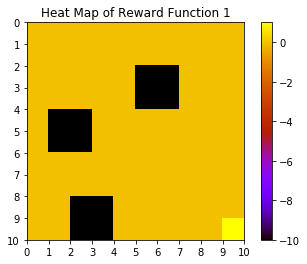

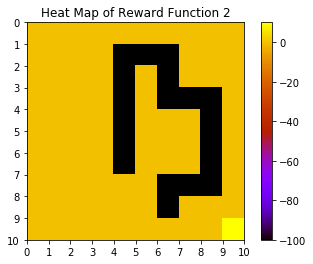

In [70]:
reward1 = np.zeros((10,10))
reward1[9,9] = 1
neg_tens = [(2,5),(2,6),(3,5),(3,6),(4,1),(4,2),(5,1),(5,2),(8,2),(8,3),(9,2),(9,3)]
for i,j in neg_tens:
    reward1[i,j] = -10

fig, ax = plt.subplots()
ax = plot_heatmap(ax, reward1, 'Heat Map of Reward Function 1')
plt.show()

reward2 = np.zeros((10,10))
neg_hundreds = [(1,4),(1,5),(1,6),(2,4),(2,6),(3,4),(3,6),(3,7),(3,8),(4,4),(4,8),(5,4),(5,8),(6,4),(6,8),(7,6),(7,7),(7,8),(8,6)]
for i,j in neg_hundreds:
    reward2[i,j] = -100   
reward2[9,9] = 10

fig, ax = plt.subplots()
ax = plot_heatmap(ax, reward2, 'Heat Map of Reward Function 2')
plt.show()

# **RL Functions**

In [20]:
# To find the next state position with definite action (no probability)
def nexts(state, action, reward):
    row = state % reward.shape[0]
    col = math.floor(state / reward.shape[1])
    if action == 0: #up
        if (row % 10 == 0):
            row = row
        else:
            row = row - 1
        col = col
    if action == 1: #down
        if (row % 10 == 9):
            row = row
        else:
            row = row +1
        col = col
    if action == 2: #left
        if (col % 10 == 0):
            col = col
        else:
            col = col - 1
        row = row
    if action == 3: #right
        if (col % 10 == 9):
            col = col
        else:
            col = col + 1 
        row = row
    return(row, col)

In [21]:
def action_score(action, state, V, w, reward, gamma):
    action_score = 0
    for move in range(4):
        p = w/4
        if action == move: 
            p += 1 - w
        next_row, next_col = nexts(state,move,reward)
        next_state = next_col*10+next_row
        action_score += p * (reward[next_row,next_col] + gamma*V[next_state])
    return(action_score)

In [101]:
# Value interation algorithm
def optimal_state_value(V, policy, w, gamma, reward, epsilon):
    # Initialization
    for state in range(100):
        V[state] = 0

    # Esitimation
    delta = float('inf')
    iter = 0
    while delta > epsilon:
        iter += 1
        delta = 0
        for state in range(100):
            v = V[state]
            V[state] = max(action_score(0, state, V, w, reward, gamma),
                           action_score(1, state, V, w, reward, gamma),
                           action_score(2, state, V, w, reward, gamma),
                           action_score(3, state, V, w, reward, gamma))
            delta = max(delta, abs(v - V[state]))
            policy[state] = np.argmax([action_score(0, state, V, w, reward, gamma),
                                       action_score(1, state, V, w, reward, gamma),
                                       action_score(2, state, V, w, reward, gamma),
                                       action_score(3, state, V, w, reward, gamma)])
        if iter % 4 == 1:
            print('iter = ', str(iter), '\tdelta = ', str(delta))
#             fig, ax = plt.subplots()
#             ax = plot_table(ax, np.round(V, decimals=3).reshape(10, 10).transpose(), 'iter = ' + str(iter))
#             plt.show()
    return V, iter, policy

In [23]:
# To plot arrows from optimal policy
def optimal_policy_map(policy_map, opt_policy):
    arrows = ['\u2191','\u2193','\u2190', '\u2192', ] #  up, down, left, right
    for state in range(100):
        policy_map[state] = arrows[int(opt_policy[state])]
    return(policy_map)

In [96]:
# plot tables of state values
def plot_table(ax, data, title = ""):
    the_table = ax.table(cellText= data, loc='center')
    the_table.scale(1, 1.82)
    ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10])
    ax.invert_yaxis()
    ax.set_title(title)
    return ax

# Question 2: Reward 1, w = 0.1

iter =  1 	delta =  0.9869999990494118


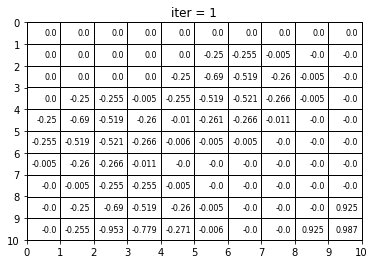

iter =  5 	delta =  0.38758586879370904


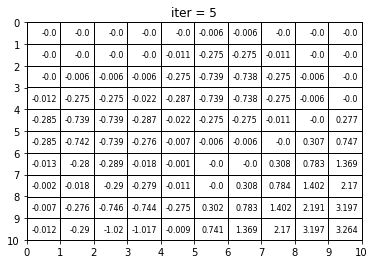

iter =  9 	delta =  0.15224300428924575


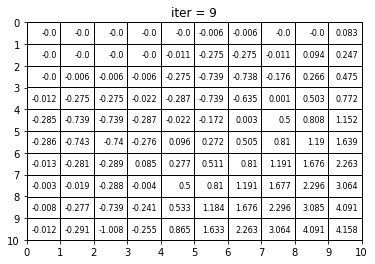

iter =  13 	delta =  0.0600732755834123


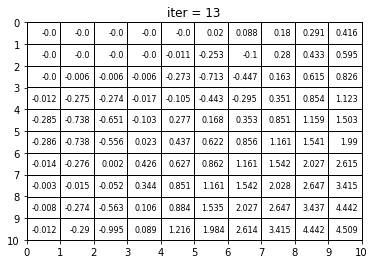

iter =  17 	delta =  0.023873562432831813


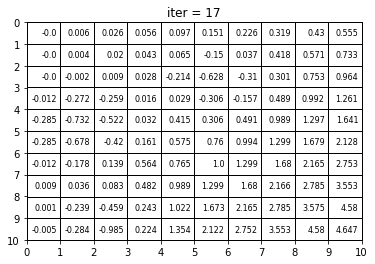

iter =  21 	delta =  0.00938117320109072


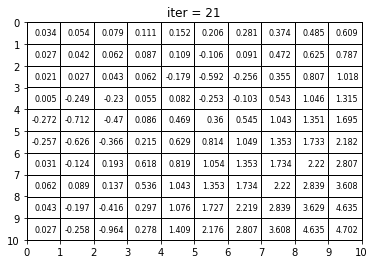

total iteration:  21


In [92]:
w = 0.1
gamma = 0.8
eps = 0.01
num_states = 100
state_values = np.zeros((num_states))
policy_values = np.zeros((num_states))
values_reward1, iteration, opt_policy = optimal_state_value(state_values, policy_values, w, gamma, reward1, eps)
print('total iteration: ', str(iteration))

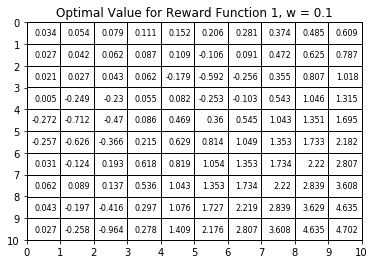

In [95]:
fig, ax = plt.subplots()
ax = plot_table(ax, np.round(values_reward1, decimals=3).reshape(10, 10).transpose(), 'Optimal Value for Reward Function 1, w = 0.1')
plt.show()

# Question 3

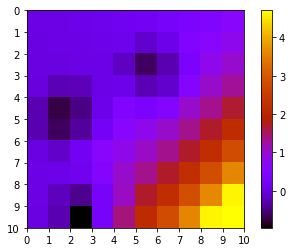

In [89]:
gif, ax = plt.subplots()
title = "Heat Map of Optimal State Values for Reward Function 1, w = 0.1"
ax = plot_heatmap(ax, np.round(values_reward1, decimals=3).reshape(10, 10).transpose(), "")
plt.show()

# Quesion 5

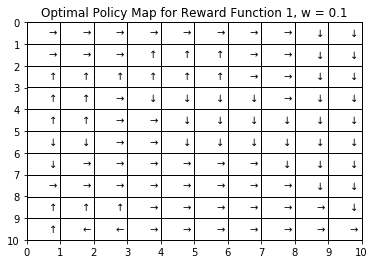

In [128]:
policy_map = [0 for i in range(100)]
policy_plot = optimal_policy_map(policy_map, opt_policy)

fig, ax = plt.subplots()
title = 'Optimal Policy Map for Reward Function 1, w = 0.1'
ax = plot_table(ax, np.array(policy_plot).reshape(10, 10).transpose(), title)
plt.show()

# Question 6: Reward Function 2, w = 0.1

iter =  1 	delta =  9.866709423845043
iter =  5 	delta =  3.8744281594997716
iter =  9 	delta =  1.521867834120414
iter =  13 	delta =  0.5992258093954508
iter =  17 	delta =  0.23868635387358061
iter =  21 	delta =  0.09546821465181732
iter =  25 	delta =  0.03813929939013894
iter =  29 	delta =  0.01498329220084349
31


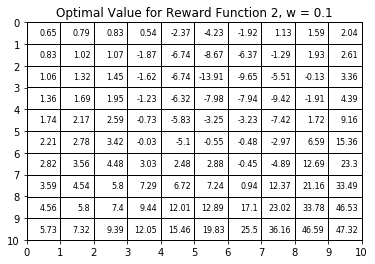

In [102]:
w = 0.1
gamma = 0.8
eps = 0.01
num_states = 100
state_values = np.zeros((num_states))
policy_values = np.zeros((num_states))
values_reward2,iteration,opt_policy_2 = optimal_state_value(state_values,policy_values, w, gamma, reward2, eps)
print(iteration)

fig, ax = plt.subplots()
title = "Optimal Value for Reward Function 2, w = 0.1"
ax = plot_table(ax, np.round(values_reward2, decimals=2).reshape(10, 10).transpose(), title)
plt.show()

# Question 7

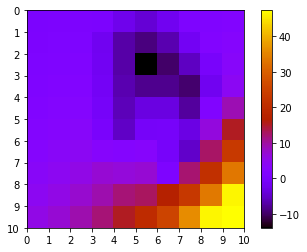

In [105]:
fig, ax = plt.subplots()
title = "Heat Map of Optimal State Values for Reward Function 2"
ax = plot_heatmap(ax, np.round(values_reward2, decimals=3).reshape(10, 10).transpose(), "")
plt.show()

# Question 8

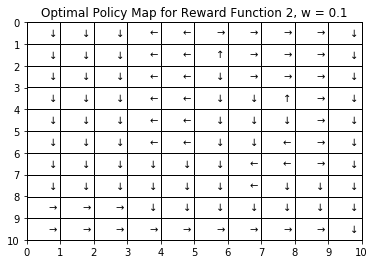

In [129]:
policy_map = [0 for i in range(100)]
policy_plot2 = optimal_policy_map(policy_map, opt_policy_2)

fig, ax = plt.subplots()
title = 'Optimal Policy Map for Reward Function 2, w = 0.1'
ax = plot_table(ax, np.array(policy_plot2).reshape(10, 10).transpose(), title)
plt.show()

# Question 9

## Reward Function 1, w = 0.6

iter =  1 	delta =  5.707293756948481
iter =  5 	delta =  0.22381272839877653
iter =  9 	delta =  0.06525748241862805
iter =  13 	delta =  0.019198763436491628
16


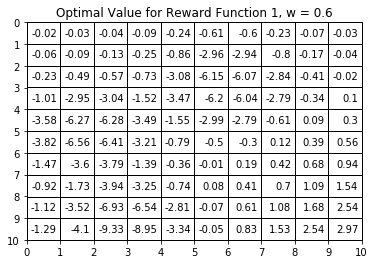

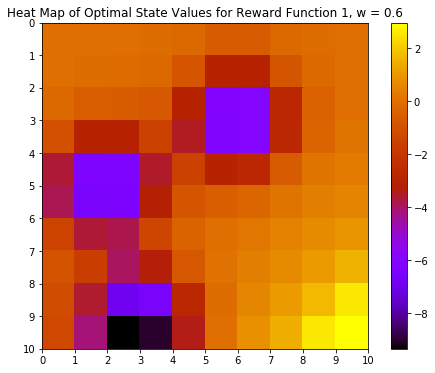

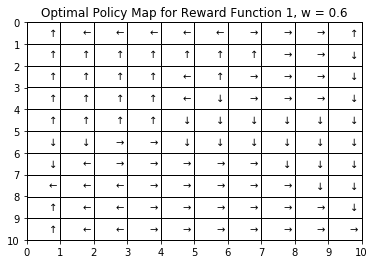

In [130]:
w = 0.6
gamma = 0.8
eps = 0.01
num_states = 100
state_values = np.zeros((num_states))
policy_values = np.zeros((num_states))
values_reward1_2,iteration,opt_policy_1_2 = optimal_state_value(state_values,policy_values, w, gamma, reward1, eps)
print(iteration)

fig, ax = plt.subplots()
title = 'Optimal Value for Reward Function 1, w = 0.6'
ax = plot_table(ax, np.round(values_reward1_2, decimals=2).reshape(10, 10).transpose(), title)
plt.show()


fig, ax = plt.subplots(figsize=(8,6))
title = "Heat Map of Optimal State Values for Reward Function 1, w = 0.6"
ax = plot_heatmap(ax, np.round(values_reward1_2, decimals=3).reshape(10, 10).transpose(), title)
plt.show()


policy_map = [0 for i in range(100)]
policy_plot1_2 = optimal_policy_map(policy_map, opt_policy_1_2)

fig, ax = plt.subplots()
title = 'Optimal Policy Map for Reward Function 1, w = 0.6'
ax = plot_table(ax, np.array(policy_plot1_2).reshape(10, 10).transpose(), title)
plt.show()

## Reward Function 2, w = 0.6

iter =  1 	delta =  53.78976
iter =  5 	delta =  6.052671593098836
iter =  9 	delta =  0.8604363492338791
iter =  13 	delta =  0.12957266405573264
iter =  17 	delta =  0.03786778080999653
iter =  21 	delta =  0.011075536981692835
22


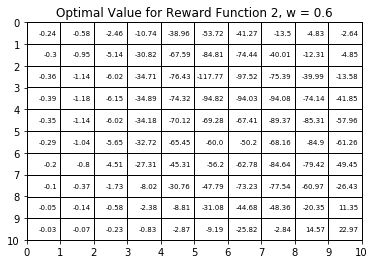

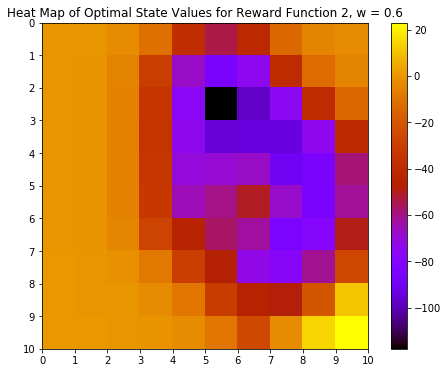

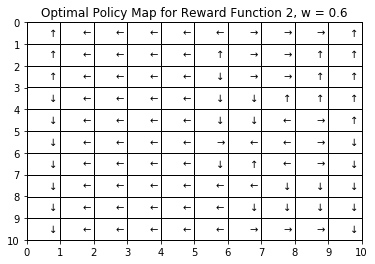

In [131]:
w = 0.6
gamma = 0.8
eps = 0.01
num_states = 100
state_values = np.zeros((num_states))
policy_values = np.zeros((num_states))
values_reward2_2,iteration,opt_policy_2_2 = optimal_state_value(state_values,policy_values, w, gamma, reward2, eps)
print(iteration)

fig, ax = plt.subplots()
title = 'Optimal Value for Reward Function 2, w = 0.6'
ax = plot_table(ax, np.round(values_reward2_2, decimals=2).reshape(10, 10).transpose(), title)
plt.show()


fig, ax = plt.subplots(figsize=(8,6))
title = "Heat Map of Optimal State Values for Reward Function 2, w = 0.6"
ax = plot_heatmap(ax, np.round(values_reward2_2, decimals=3).reshape(10, 10).transpose(), title)
plt.show()


policy_map = [0 for i in range(100)]
policy_plot2_2 = optimal_policy_map(policy_map, opt_policy_2_2)

fig, ax = plt.subplots()
title = 'Optimal Policy Map for Reward Function 2, w = 0.6'
ax = plot_table(ax, np.array(policy_plot2_2).reshape(10, 10).transpose(), title)
plt.show()

# define IRL functions

In [145]:
def initial(x,y):
    V = np.zeros((x,y))     
    delta = math.inf
    return V, delta

In [146]:
# Attention: action index here is different from the previous definition
x, y = 10, 10
V_ini, delta_ini = initial(x,y)
actions = ["up","left","right","down"]
action_dict = {0:'up', 1:'left', 2:'right', 3:'down'}
actions_to_arrow_dict = {"up":'\u2191', "left":'\u2190', "right":'\u2192', "down":'\u2193'}
w = 0.1

def calc_prob(w,action):
    # probability
    p_intent = 1 - w + 0.25 * w
    p_unintent = 0.25 * w
    trans_prob = [p_unintent]*4
        
    if action == "up":
        trans_prob[0] = p_intent
    elif action == "left":
        trans_prob[1] = p_intent
    elif action == "right":
        trans_prob[2] = p_intent
    elif action == "down":
        trans_prob[3] = p_intent
    return trans_prob

# calculate transition probability matrices
def trans_prob_mat(x,y,w,actions,pi):
    t_all = {}
    t_all["up"],t_all["left"],t_all["right"],t_all["down"] = np.zeros([100, 100]),np.zeros([100, 100]),np.zeros([100, 100]),np.zeros([100, 100])
    Pa1,Pa2,Pa3,Pa4 = np.zeros([100, 100]),np.zeros([100, 100]),np.zeros([100, 100]),np.zeros([100, 100])
    Pa = [Pa2,Pa3,Pa4]
    
    for i in range(x):
        for j in range(y):
            state_num = 10 * i + j                  # 0 ~ 99
            neighbours = [(max(0,i-1),j),(i,max(j-1,0)),(i,min(j+1,y-1)),(min(i+1,x-1),j)]     # up, left, right, down
               
            for act_num in range(4):      # 4 actions
                act = actions[act_num]
                trans_prob = calc_prob(w,act)
                for neighbour_num in range(4):      # 4 neighbours
                    trans_state_num = neighbours[neighbour_num][0] * 10 + neighbours[neighbour_num][1]
                    t_all[act][state_num,trans_state_num] += trans_prob[neighbour_num]
                                       
    for i in range(x):
        for j in range(y):
            state_num = 10 * i + j
            action_expert = actions[int(pi[i,j])]
            agent = 0

            for act in actions:
                if act == action_expert:
                    Pa1[state_num] = t_all[act][state_num]
                else:
                    Pa[agent][state_num] = t_all[act][state_num]
                    agent = agent + 1
                    
    Pa2, Pa3, Pa4 = Pa[0], Pa[1], Pa[2]
    return Pa1, Pa2, Pa3, Pa4            

In [156]:
n = 100
# construct and solve the linear function
def get_reward_agent(n,Pa1,Pa2,Pa3,Pa4,x,y,gamma,l,Rmax):    # n = state number
    from cvxopt import matrix, solvers
    I = np.ones(n)
    lambda_I = l*I
    # c
    c = matrix(np.concatenate((-I,lambda_I,np.zeros(n)), axis=None))

    M1 = -np.dot((Pa1 - Pa2),np.linalg.inv(np.eye(100) - gamma * Pa1))
    M2 = -np.dot((Pa1 - Pa3),np.linalg.inv(np.eye(100) - gamma * Pa1))
    M3 = -np.dot((Pa1 - Pa4),np.linalg.inv(np.eye(100) - gamma * Pa1))

    G_r = np.concatenate((M1,M2,M3,M1,M2,M3,-np.eye(100),np.eye(100),np.eye(100),-np.eye(100)),axis=0)
    G_u = np.concatenate((np.zeros((600,100)),-np.eye(100),-np.eye(100),np.zeros((100,100)),np.zeros((100,100))))
    G_t = np.concatenate((np.zeros((300,100)),np.eye(100),np.eye(100),np.eye(100),np.zeros((400,100))))
    G = np.concatenate((G_t,G_u,G_r),axis=1)
    G = matrix(G)
    
    # h
    h = np.concatenate((np.zeros(600),np.zeros(200),np.ones(100)*(Rmax),np.ones(100)*(Rmax)),axis=None)
    h = matrix(list(h),(1000,1),'d')
    
    # solve LP
    solvers.options['show_progress'] = False
    sol = solvers.lp(c, G, h)
    R = sol['x'][200:]
    return np.reshape(R,(10,10))

In [148]:
# calculate accuracy
def calc_accuracy(Oagent,Oexpert,state_num):
    ms = 0
    Oagent = np.reshape(Oagent,state_num)
    Oexpert = np.reshape(Oexpert,state_num)
    for i in range(state_num):        
        if Oagent[i] == Oexpert[i]:
            ms = ms + 1
    accuracy = ms/state_num
    return accuracy

In [153]:
# Plot policy map in arrows
def plot_actions(action_map, title):         
    pi_estring = ['' for i in range(100)]
    pi_estring = np.array(pi_estring).reshape(10,10)
    for i in range(10):
        for j in range(10):
            action_ind = int(action_map[i,j])
            pi_estring[i,j] = action_to_arrow_dict[action_ind]

    fig, ax = plt.subplots()
    ax = plot_table(ax, pi_estring, title)
    plt.show()  
    
# plot state values in a chart
def plot_value(chart,x,y, title):
    fig = plt.figure()
    ax = plt.gca()
    ax.invert_yaxis()
    ax.set_xticks(np.arange(0,x+1,1))
    ax.set_yticks(np.arange(0,y+1,1))
    ax.set_title(title)
    
    for i in range(x):
        for j in range(y):
            plt.text(j + 0.5, i + 0.5, '%.3f' % chart[i,j],
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=10, color='black')
    plt.grid()
    plt.show()

In [151]:
# calculate optimal values
def update_value(action,i,j,x,y,R,V,gamma):
    trans_prob = calc_prob(w,action)
    neighbours = [(max(0,i-1),j),(i,max(j-1,0)),(i,min(j+1,y-1)),(min(i+1,x-1),j)]
    update_v = sum(trans_prob[ind]*(R[neighbours[ind]]+gamma*V[neighbours[ind]]) for ind in range(4))
    
    return update_v

# Estimate optimal values and coresponding actions
def estimation(eps,delta,V,x,y,R,gamma,w,actions):
    pi = np.zeros((x,y))
    while delta > eps:
        delta = 0
        for i in range(x):
            for j in range(y):
                previous = V[i,j]
                action_lst = [update_value(action,i,j,x,y,R,V,gamma) for action in actions]
                V[i,j] = max(action_lst)
                pi[i,j] = np.argmax(action_lst)
                delta = max(delta,abs(previous-V[i,j]))
    return V,pi


# Question 11. find lambda for RF1

In [198]:
n = 100
x, y = 10, 10
w = 0.1
gamma = 0.8
eps = 0.01

V_ini, delta_ini = initial(x,y)

# pi1 is equal to the ground truth policy in Question 5
optimal_V1,pi1 = estimation(eps,delta_ini,V_ini,x,y,reward1,gamma,w,actions)

Pa1, Pa2, Pa3, Pa4 = trans_prob_mat(x,y,w,actions,pi1)
Rmax1 = int(np.max(reward1))

acc1 = np.zeros(500)
lambda_lst = np.linspace(0, 5, 500)
for i in range(500):
    V_ini, delta_ini = initial(x,y)
    ll = lambda_lst[i]
    R_l = get_reward_agent(n,Pa1,Pa2,Pa3,Pa4,x,y,gamma,ll,Rmax1)
    opt_v,pi_l = estimation(eps,delta_ini,V_ini,x,y,R_l,gamma,w,actions)
    acc1[i] = calc_accuracy(pi_l,pi1,n)

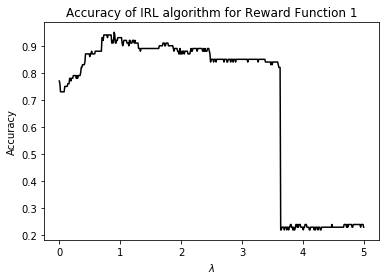

In [162]:
fig, ax = plt.subplots()
plt.plot(lambda_lst,acc1, color="black")
plt.xlabel('$\lambda$')
plt.ylabel('Accuracy')
plt.title('Accuracy of IRL algorithm for Reward Function 1')
plt.show()

# Question 12: find lambda_max for RF1

In [163]:
idx = np.argmax(acc1)
best_lamb = lambda_lst[idx]
print((best_lamb, acc1[idx]))

(0.9018036072144289, 0.95)


# Question 13. heat maps of the ground truth reward and the extracted reward.

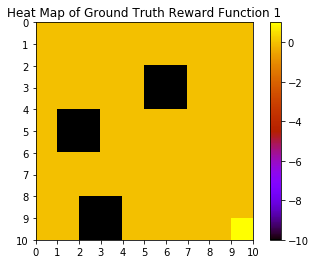

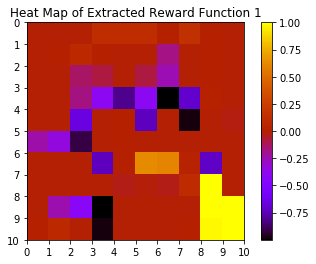

In [199]:
R_opt1 = get_reward_agent(n,Pa1,Pa2,Pa3,Pa4,x,y,gamma,best_lamb,Rmax1)

fig, ax = plt.subplots()
ax = plot_heatmap(ax, reward1, 'Heat Map of Ground Truth Reward Function 1')
plt.show()

fig, ax = plt.subplots()
ax = plot_heatmap(ax, R_opt1, 'Heat Map of Extracted Reward Function 1')
plt.show()

# Q14-17. heat map of the optimal state values from extracted RF1

iter =  1 	delta =  2.720318781804229
iter =  5 	delta =  0.5177244687886016
iter =  9 	delta =  0.18169240761620858
iter =  13 	delta =  0.05624044935341399
iter =  17 	delta =  0.011706452571376258
18


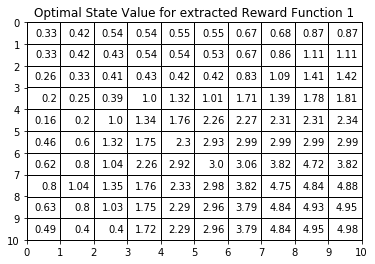

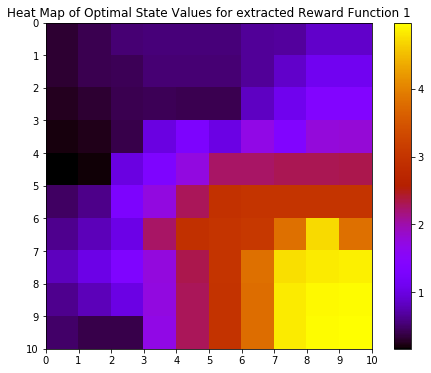

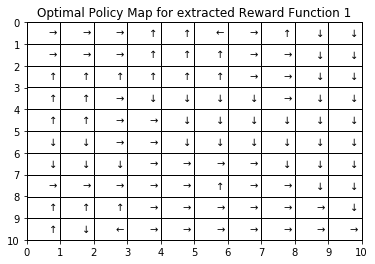

In [180]:
w = 0.1
gamma = 0.8
eps = 0.01
num_states = 100
state_values = np.zeros((num_states))
policy_values = np.zeros((num_states))
values_reward1_3,iteration,opt_policy_1_3 = optimal_state_value(state_values,policy_values, w, gamma, R_opt1, eps)
print(iteration)

fig, ax = plt.subplots()
title = 'Optimal State Value for extracted Reward Function 1'
ax = plot_table(ax, np.round(values_reward1_3, decimals=2).reshape(10, 10).transpose(), title)
plt.show()


fig, ax = plt.subplots(figsize=(8,6))
title = "Heat Map of Optimal State Values for extracted Reward Function 1"
ax = plot_heatmap(ax, np.round(values_reward1_3, decimals=3).reshape(10, 10).transpose(), title)
plt.show()


policy_map = [0 for i in range(100)]
policy_plot1_3 = optimal_policy_map(policy_map, opt_policy_1_3)

fig, ax = plt.subplots()
title = 'Optimal Policy Map for extracted Reward Function 1'
ax = plot_table(ax, np.array(policy_plot1_3).reshape(10, 10).transpose(), title)
plt.show()

# Quesion 17. policy comparison

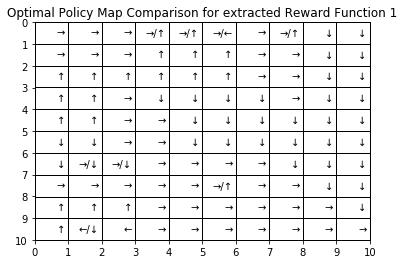

In [207]:
fig, ax = plt.subplots()
title = 'Optimal Policy Map Comparison for extracted Reward Function 1'
policy_diff = []
for i in range(n):
    if policy_plot[i] == policy_plot1_3[i]:
        policy_diff.append(policy_plot[i])
    else:
        policy_diff.append(policy_plot[i]+"/"+policy_plot1_3[i])
ax = plot_table(ax, np.array(policy_diff).reshape(10, 10).transpose(), title)
plt.show()

# Question 18. find lambda for RF2

In [197]:
n = 100
x, y = 10, 10
w = 0.1
gamma = 0.8
eps = 0.01

V_ini, delta_ini = initial(x,y)

# pi1 is equal to the ground truth policy in Question 8
optimal_V2,pi2 = estimation(eps,delta_ini,V_ini,x,y,reward2,gamma,w,actions)

Pa1_2, Pa2_2, Pa3_2, Pa4_2 = trans_prob_mat(x,y,w,actions,pi2)
Rmax2 = int(np.max(reward2))

acc2 = np.zeros(500)
lambda_lst = np.linspace(0, 5, 500)
for i in range(500):
    V_ini, delta_ini = initial(x,y)
    ll = lambda_lst[i]
    R_l = get_reward_agent(n,Pa1_2,Pa2_2,Pa3_2,Pa4_2,x,y,gamma,ll,Rmax2)
    opt_v,pi_2 = estimation(eps,delta_ini,V_ini,x,y,R_l,gamma,w,actions)
    acc2[i] = calc_accuracy(pi_2,pi2,n)

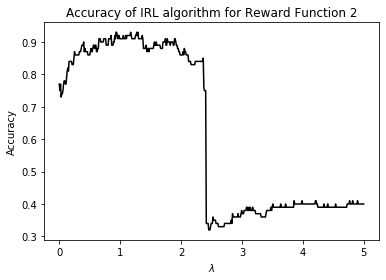

In [184]:
fig, ax = plt.subplots()
plt.plot(lambda_lst,acc2, color="black")
plt.xlabel('$\lambda$')
plt.ylabel('Accuracy')
plt.title('Accuracy of IRL algorithm for Reward Function 2')
plt.show()

# Question 19. finc lambda_max for RF2

In [185]:
idx = np.argmax(acc2)
best_lamb2 = lambda_lst[idx]
print((best_lamb2, acc2[idx]))

(0.9318637274549098, 0.93)


# Question 20. heatmap of ground truth and extracted reward

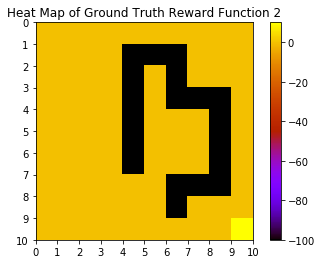

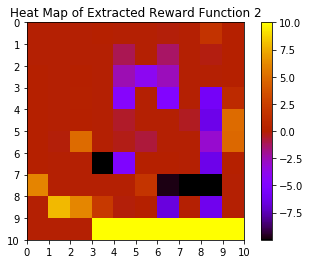

In [196]:
R_opt2 = get_reward_agent(n,Pa1_2,Pa2_2,Pa3_2,Pa4_2,x,y,gamma,best_lamb2,Rmax2)

fig, ax = plt.subplots()
ax = plot_heatmap(ax, reward2, 'Heat Map of Ground Truth Reward Function 2')
plt.show()

fig, ax = plt.subplots()
ax = plot_heatmap(ax, R_opt2, 'Heat Map of Extracted Reward Function 2')
plt.show()

# Question 21-24. optimal state value  and policy for extracted RF2

iter =  1 	delta =  34.13184117552384
iter =  5 	delta =  6.937386619010591
iter =  9 	delta =  1.7683604509774131
iter =  13 	delta =  0.5609553848131714
iter =  17 	delta =  0.21725618320138462
iter =  21 	delta =  0.0421850761542526
iter =  25 	delta =  0.007423901672727773
25


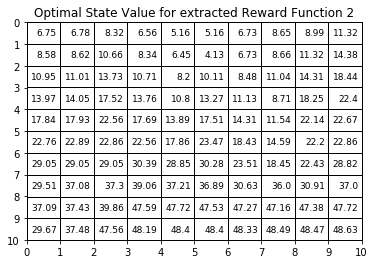

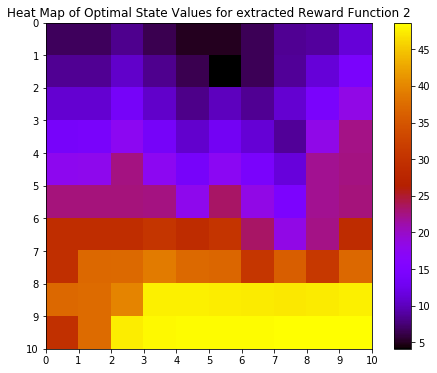

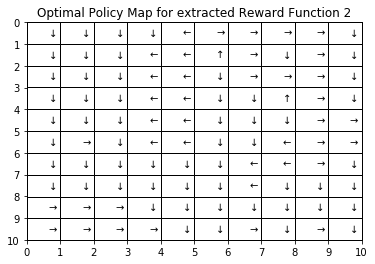

In [200]:
w = 0.1
gamma = 0.8
eps = 0.01
num_states = 100
state_values = np.zeros((num_states))
policy_values = np.zeros((num_states))
values_reward2_3,iteration,opt_policy_2_3 = optimal_state_value(state_values,policy_values, w, gamma, R_opt2, eps)
print(iteration)

fig, ax = plt.subplots()
title = 'Optimal State Value for extracted Reward Function 2'
ax = plot_table(ax, np.round(values_reward2_3, decimals=2).reshape(10, 10).transpose(), title)
plt.show()


fig, ax = plt.subplots(figsize=(8,6))
title = "Heat Map of Optimal State Values for extracted Reward Function 2"
ax = plot_heatmap(ax, np.round(values_reward2_3, decimals=3).reshape(10, 10).transpose(), title)
plt.show()


policy_map = [0 for i in range(100)]
policy_plot2_3 = optimal_policy_map(policy_map, opt_policy_2_3)

fig, ax = plt.subplots()
title = 'Optimal Policy Map for extracted Reward Function 2'
ax = plot_table(ax, np.array(policy_plot2_3).reshape(10, 10).transpose(), title)
plt.show()

iter =  1 	delta =  15.569516911208362
iter =  5 	delta =  2.689975303273087
iter =  9 	delta =  0.678490306833897
iter =  13 	delta =  0.20775061601668554
iter =  17 	delta =  0.06581826413358272
iter =  21 	delta =  0.020653904424726255
24


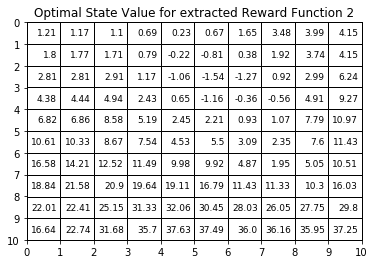

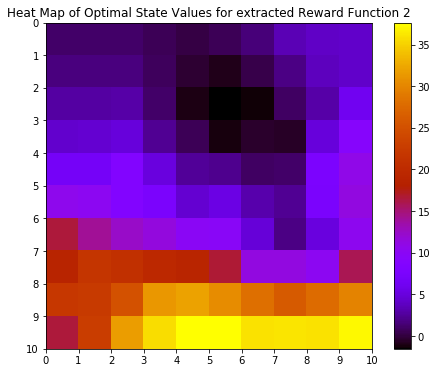

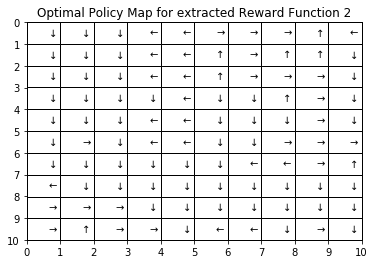

In [201]:
w = 0.6
gamma = 0.8
eps = 0.01
num_states = 100
state_values = np.zeros((num_states))
policy_values = np.zeros((num_states))
values_reward2_4,iteration,opt_policy_2_4 = optimal_state_value(state_values,policy_values, w, gamma, R_opt2, eps)
print(iteration)

fig, ax = plt.subplots()
title = 'Optimal State Value for extracted Reward Function 2'
ax = plot_table(ax, np.round(values_reward2_4, decimals=2).reshape(10, 10).transpose(), title)
plt.show()


fig, ax = plt.subplots(figsize=(8,6))
title = "Heat Map of Optimal State Values for extracted Reward Function 2"
ax = plot_heatmap(ax, np.round(values_reward2_4, decimals=3).reshape(10, 10).transpose(), title)
plt.show()


policy_map = [0 for i in range(100)]
policy_plot2_4 = optimal_policy_map(policy_map, opt_policy_2_4)

fig, ax = plt.subplots()
title = 'Optimal Policy Map for extracted Reward Function 2'
ax = plot_table(ax, np.array(policy_plot2_4).reshape(10, 10).transpose(), title)
plt.show()

# Question 24. policy comparison

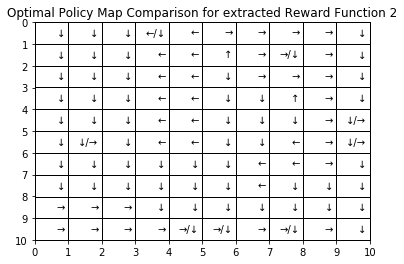

In [208]:
fig, ax = plt.subplots()
title = 'Optimal Policy Map Comparison for extracted Reward Function 2'
policy_diff = []
for i in range(n):
    if policy_plot2[i] == policy_plot2_3[i]:
        policy_diff.append(policy_plot2[i])
    else:
        policy_diff.append(policy_plot2[i]+"/"+policy_plot2_3[i])
ax = plot_table(ax, np.array(policy_diff).reshape(10, 10).transpose(), title)
plt.show()

# Question 25

In [229]:
n = 100
x, y = 10, 10
w = 0.1
gamma = 0.8
eps = 0.0000001

V_ini, delta_ini = initial(x,y)

# pi1 is equal to the ground truth policy in Question 8
# optimal_V2,pi2 = estimation(eps,delta_ini,V_ini,x,y,reward2,gamma,w,actions)

# Pa1_2, Pa2_2, Pa3_2, Pa4_2 = trans_prob_mat(x,y,w,actions,pi2)
# Rmax2 = int(np.max(reward2))

acc3 = np.zeros(500)
lambda_lst = np.linspace(0, 5, 500)
for i in range(500):
    V_ini, delta_ini = initial(x,y)
    ll = lambda_lst[i]
    R_l = get_reward_agent(n,Pa1_2,Pa2_2,Pa3_2,Pa4_2,x,y,gamma,ll,Rmax2)
    opt_v,pi_3 = estimation(eps,delta_ini,V_ini,x,y,R_l,gamma,w,actions)
    acc3[i] = calc_accuracy(pi_3,pi2,n)

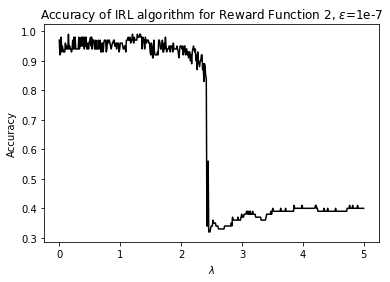

In [230]:
fig, ax = plt.subplots()
plt.plot(lambda_lst,acc3, color="black")
plt.xlabel('$\lambda$')
plt.ylabel('Accuracy')
plt.title('Accuracy of IRL algorithm for Reward Function 2, $\epsilon$=1e-7')
plt.show()

In [231]:
idx = np.argmax(acc3)
best_lamb3 = lambda_lst[idx]
print((best_lamb3, acc3[idx]))

(0.1503006012024048, 0.99)


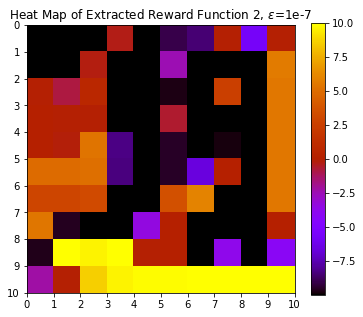

In [252]:
R_opt3 = get_reward_agent(n,Pa1_2,Pa2_2,Pa3_2,Pa4_2,x,y,gamma,best_lamb3,Rmax2)

fig, ax = plt.subplots(figsize=(6,5))
ax = plot_heatmap(ax, R_opt3, 'Heat Map of Extracted Reward Function 2, $\epsilon$=1e-7')
plt.show()

iter =  1 	delta =  34.13184117552384
iter =  5 	delta =  6.937386619010591
iter =  9 	delta =  1.7683604509774131
iter =  13 	delta =  0.5609553848131714
iter =  17 	delta =  0.21725618320138462
iter =  21 	delta =  0.0421850761542526
iter =  25 	delta =  0.007423901672727773
25


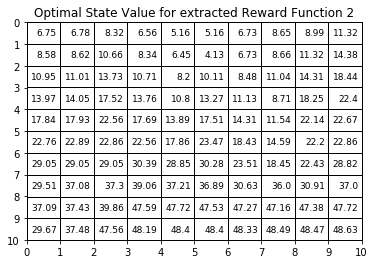

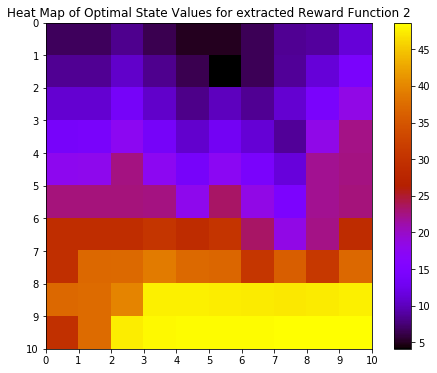

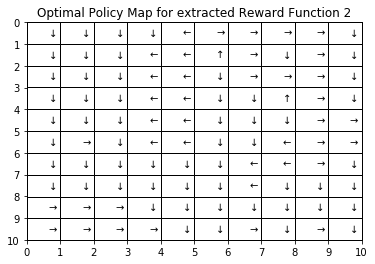

In [200]:
w = 0.1
gamma = 0.8
eps = 0.01
num_states = 100
state_values = np.zeros((num_states))
policy_values = np.zeros((num_states))
values_reward2_3,iteration,opt_policy_2_3 = optimal_state_value(state_values,policy_values, w, gamma, R_opt2, eps)
print(iteration)

fig, ax = plt.subplots()
title = 'Optimal State Value for extracted Reward Function 2'
ax = plot_table(ax, np.round(values_reward2_3, decimals=2).reshape(10, 10).transpose(), title)
plt.show()


fig, ax = plt.subplots(figsize=(8,6))
title = "Heat Map of Optimal State Values for extracted Reward Function 2"
ax = plot_heatmap(ax, np.round(values_reward2_3, decimals=3).reshape(10, 10).transpose(), title)
plt.show()


policy_map = [0 for i in range(100)]
policy_plot2_3 = optimal_policy_map(policy_map, opt_policy_2_3)

fig, ax = plt.subplots()
title = 'Optimal Policy Map for extracted Reward Function 2'
ax = plot_table(ax, np.array(policy_plot2_3).reshape(10, 10).transpose(), title)
plt.show()

iter =  1 	delta =  35.8300089334527
iter =  5 	delta =  4.358935518683708
iter =  9 	delta =  1.0321677771304643
iter =  13 	delta =  0.22968578133795248
iter =  17 	delta =  0.04046374391893437
iter =  21 	delta =  0.008118666502094918
iter =  25 	delta =  0.0029825290811587024
iter =  29 	delta =  0.0011713791980270116
iter =  33 	delta =  0.00046005842823859666
iter =  37 	delta =  0.00018068868384801817
iter =  41 	delta =  7.096613859403078e-05
iter =  45 	delta =  2.7872340595536116e-05
iter =  49 	delta =  1.0947062008881403e-05
iter =  53 	delta =  4.299554014153273e-06
iter =  57 	delta =  1.6886960949591412e-06
iter =  61 	delta =  6.632577225218483e-07
iter =  65 	delta =  2.605118538667739e-07
iter =  69 	delta =  1.023267230948477e-07
70


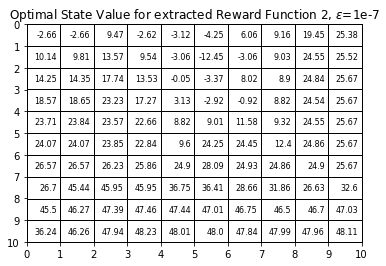

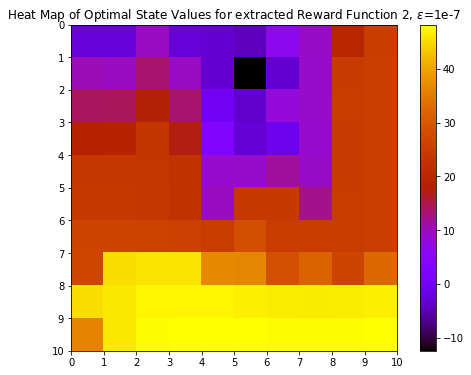

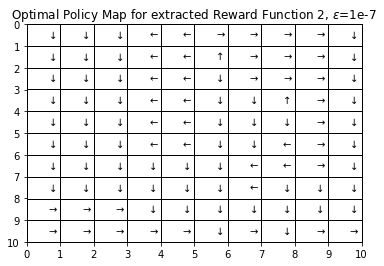

In [234]:
w = 0.1
gamma = 0.8
eps = 0.0000001
num_states = 100
state_values = np.zeros((num_states))
policy_values = np.zeros((num_states))
values_reward2_5,iteration,opt_policy_2_5 = optimal_state_value(state_values,policy_values, w, gamma, R_opt3, eps)
print(iteration)

fig, ax = plt.subplots()
title = 'Optimal State Value for extracted Reward Function 2, $\epsilon$=1e-7'
ax = plot_table(ax, np.round(values_reward2_5, decimals=2).reshape(10, 10).transpose(), title)
plt.show()


fig, ax = plt.subplots(figsize=(8,6))
title = "Heat Map of Optimal State Values for extracted Reward Function 2, $\epsilon$=1e-7"
ax = plot_heatmap(ax, np.round(values_reward2_5, decimals=3).reshape(10, 10).transpose(), title)
plt.show()


policy_map = [0 for i in range(100)]
policy_plot2_5 = optimal_policy_map(policy_map, opt_policy_2_5)

fig, ax = plt.subplots()
title = 'Optimal Policy Map for extracted Reward Function 2, $\epsilon$=1e-7'
ax = plot_table(ax, np.array(policy_plot2_5).reshape(10, 10).transpose(), title)
plt.show()

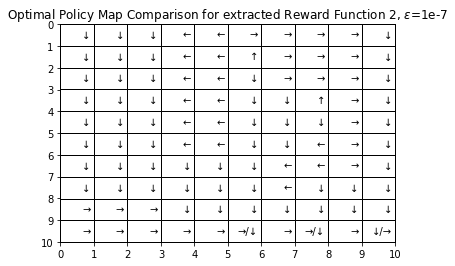

In [235]:
fig, ax = plt.subplots()
title = 'Optimal Policy Map Comparison for extracted Reward Function 2, $\epsilon$=1e-7'
policy_diff = []
for i in range(n):
    if policy_plot2[i] == policy_plot2_5[i]:
        policy_diff.append(policy_plot2[i])
    else:
        policy_diff.append(policy_plot2[i]+"/"+policy_plot2_5[i])
ax = plot_table(ax, np.array(policy_diff).reshape(10, 10).transpose(), title)
plt.show()